Problem statement: The goal is to understand the relationship between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.


### Importing and Reading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel(r"C:\Users\hp\Downloads\DS-assignment\DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


- There are no missing/null values in the data

In [4]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [5]:
# Adding a new column giving out the final price value of the house
df["House Price"] = df["House size (sqft)"]*df["House price of unit area"]

### Data Visualisation

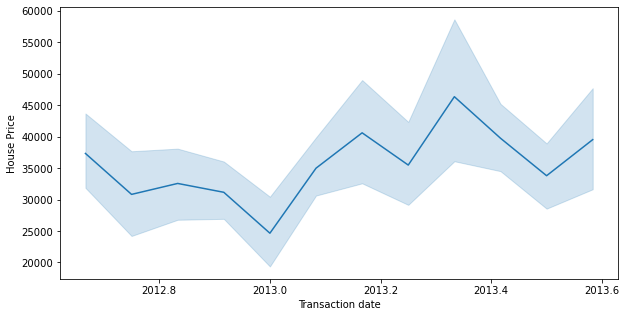

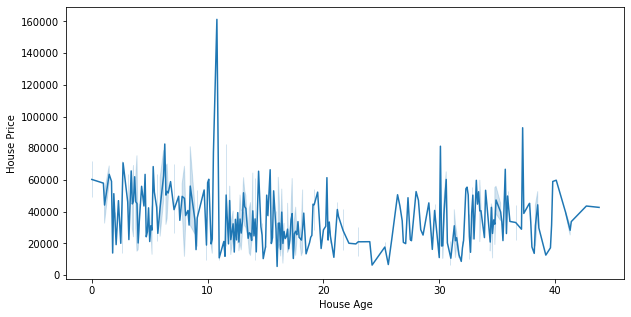

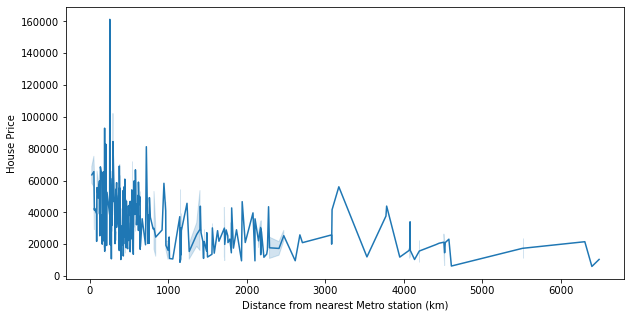

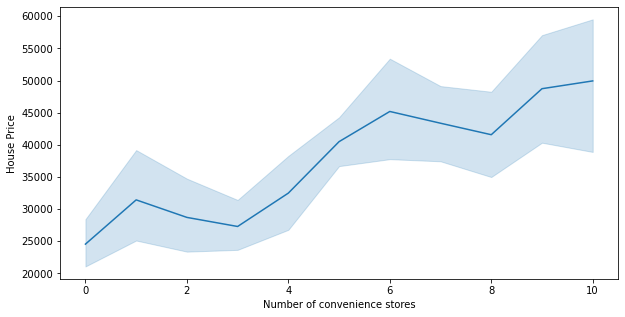

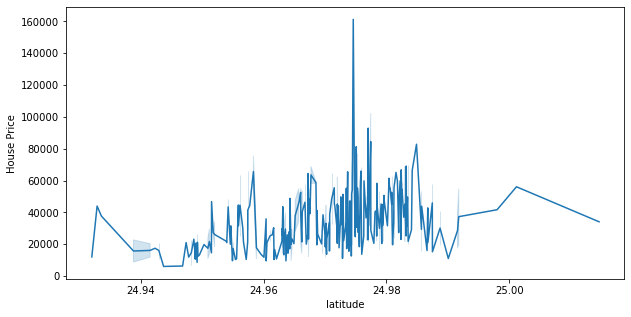

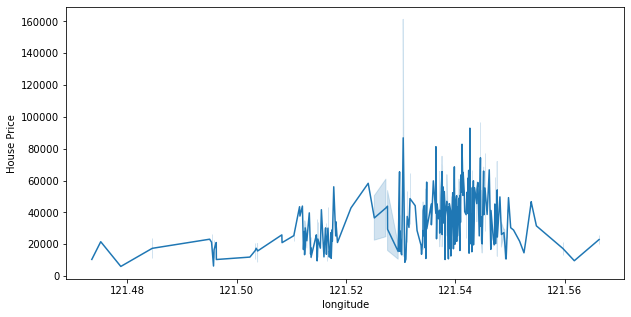

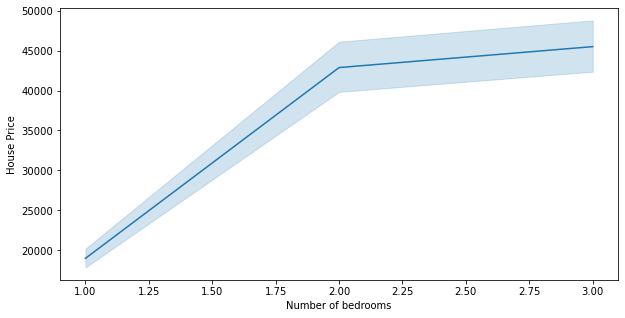

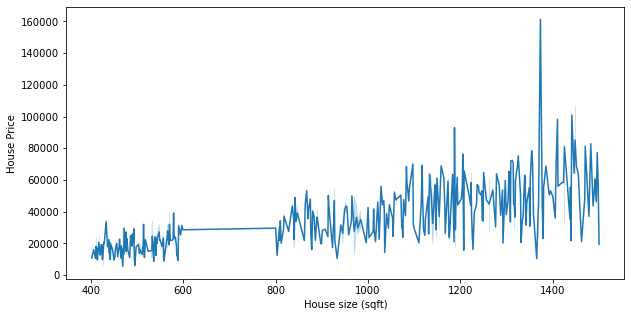

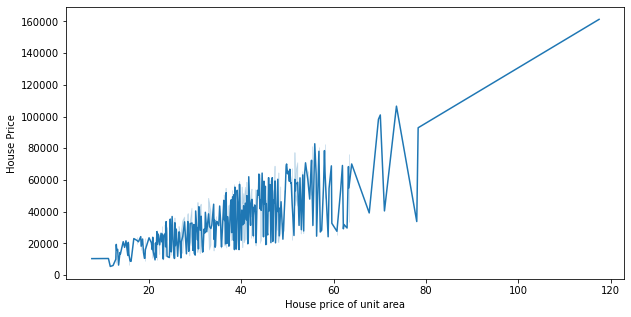

In [6]:
for i in df.columns[0:9]:
    plt.figure(figsize=(10,5))
    sns.lineplot(x=df[i], y=df["House Price"])
    plt.show()

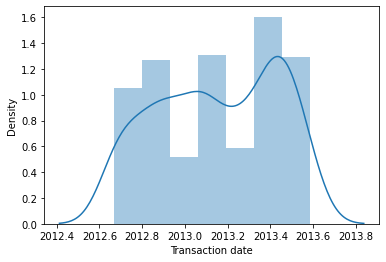

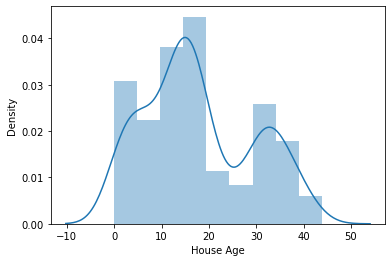

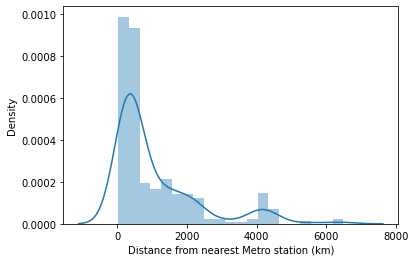

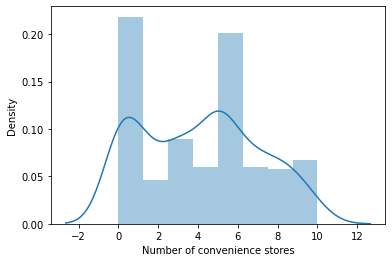

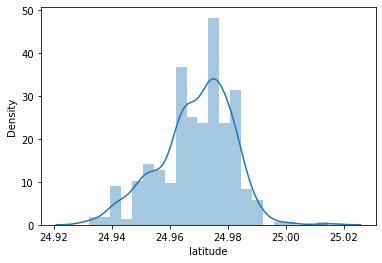

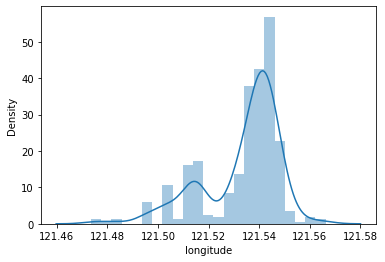

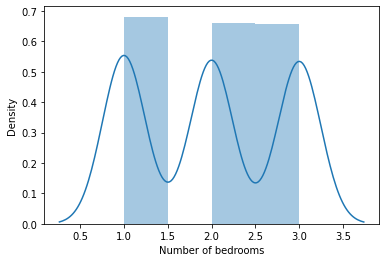

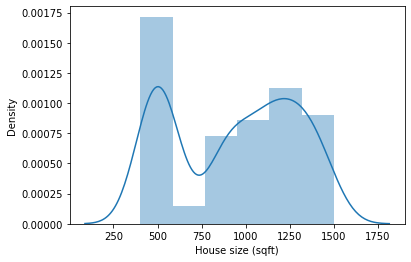

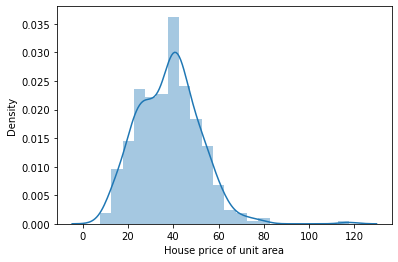

In [7]:
for i in df.columns[0:9]:
    sns.distplot(df[i])
    plt.show()

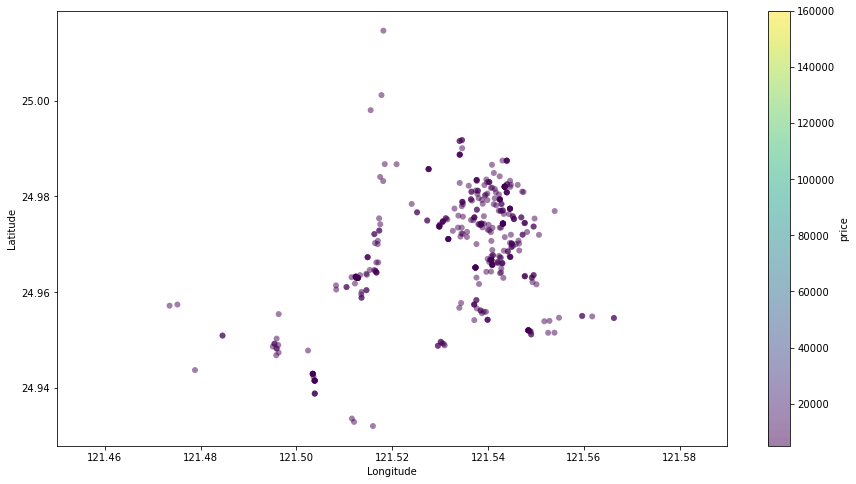

In [8]:
plt.figure(figsize= (15,8))
plt.scatter(df["longitude"], df["latitude"], c=np.log10(df['House Price']),
             cmap='viridis', linewidth=0, alpha=0.5)
plt.axis("equal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label = "price")
plt.clim(5000,160000)
plt.show()

### Feature Engineering and Feature Selection

**Checking for Outliers**

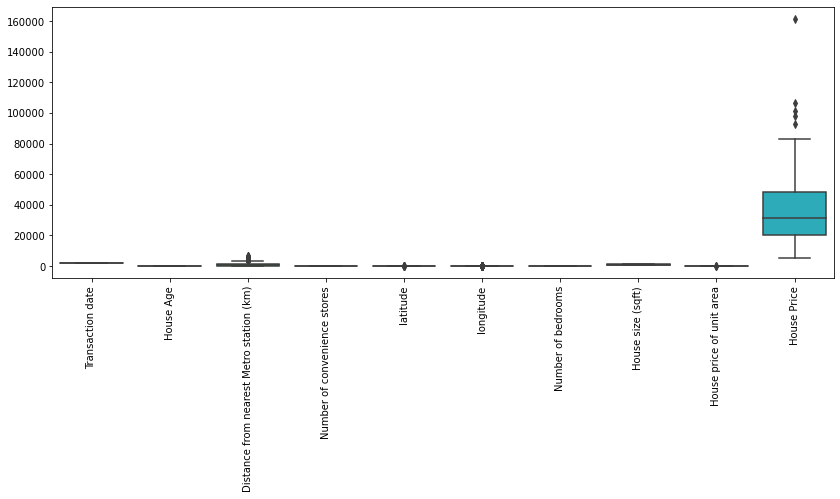

In [9]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df)
plt.xticks(rotation = 90)
plt.show()

- There are outliers in the "Distance from nearest Metro station (km)" column

In [10]:
df["Distance from nearest Metro station (km)"] = df["Distance from nearest Metro station (km)"].astype(int)
Q1=np.percentile(df["Distance from nearest Metro station (km)"],25)
Q3=np.percentile(df["Distance from nearest Metro station (km)"],75)
IQR = Q3-Q1
upper=Q3+1.5*IQR
lower = Q1 -1.5*IQR
df["Distance from nearest Metro station (km)"]=np.where(df["Distance from nearest Metro station (km)"]>upper,upper,df["Distance from nearest Metro station (km)"])

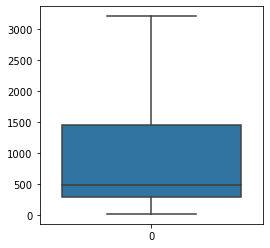

In [11]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df["Distance from nearest Metro station (km)"])
plt.show()

**Checking the correlation b/w the columns**

In [12]:
correl = df.corr()

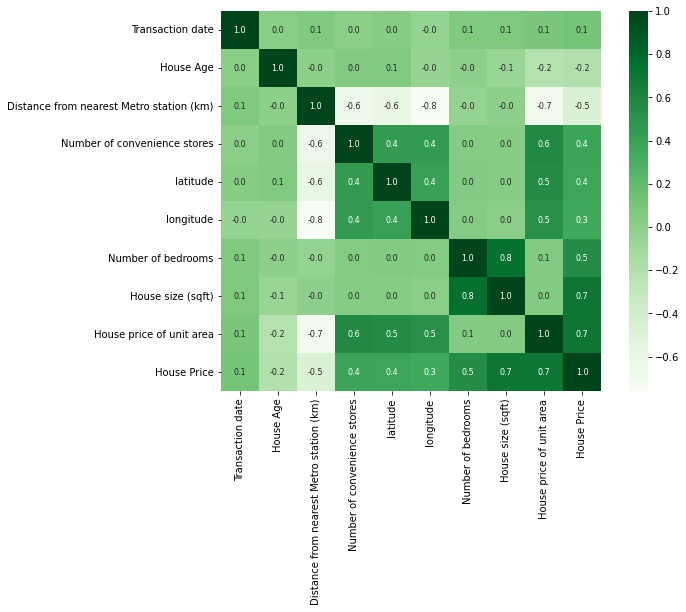

In [13]:
plt.figure(figsize= (10,7))
sns.heatmap(correl,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')
plt.show()

In [14]:
# Dropping the Transaction Date
df = df.drop("Transaction date",axis=1)

### Splitting the Data

In [15]:
x = df.drop("House Price",axis=1)
y = df["House Price"]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=47)
print(y_train.shape, x_train.shape, y_test.shape,x_test.shape)

(289,) (289, 8) (125,) (125, 8)


### Data Scaling and Model Building

In [17]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

**Linear Regression Model**

In [18]:
lreg = LinearRegression()

In [19]:
lreg.fit(x_train_sc,y_train)

LinearRegression()

In [20]:
x_train_pred = lreg.predict(x_train_sc)
x_test_pred = lreg.predict(x_test_sc)

In [21]:
# Accuracy and Evaluation
lr_score=r2_score(y_test,x_test_pred)*100
print("Test Accuracy:",r2_score(y_test,x_test_pred)*100)
print("Train Accuracy:",r2_score(y_train,x_train_pred)*100)

Test Accuracy: 89.0773154169926
Train Accuracy: 94.28559851612589


**XGBoost Regressor**

In [22]:
model = XGBRegressor()

In [23]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [24]:
train_data_pred= model.predict(x_train)
test_data_pred= model.predict(x_test)

In [33]:
# evaluating the training data
score1 = metrics.r2_score(y_train,train_data_pred)*100
print("Train Accuracy:",score1)
score2 = metrics.mean_absolute_error(y_test,test_data_pred)
print("Mean Abs Error for Train: ",score2)

Train Accuracy: 99.99996889158513
Mean Abs Error for Train:  1623.4937734375003


In [34]:
# evaluating the test data
score1 = metrics.r2_score(y_test,test_data_pred)*100
print("Test Accuracy: ",score1)
score2 = metrics.mean_absolute_error(y_test,test_data_pred)
print("Mean Abs Error for test: ",score2)

Test Accuracy:  98.52571908541111
Mean Abs Error for test:  1623.4937734375003


**Lasso**

In [27]:
lass = Lasso()

In [28]:
lass.fit(x_train_sc,y_train)

Lasso()

In [29]:
train_pred = lass.predict(x_train_sc)
test_pred = lass.predict(x_test_sc)

In [30]:
lass_score = r2_score(y_test,test_pred)*100
print("Test Accuracy:",r2_score(y_test,test_pred)*100)
print("Train Accuracy:",r2_score(y_train,train_pred)*100)

Test Accuracy: 89.08425793103171
Train Accuracy: 94.28559490824313


### Accuracy comparision

In [31]:
models = pd.DataFrame({'Model':['Linear Regression', 'XGBoost Regressor',"Lasso"],
                       'Score': [lr_score, score1,lass_score]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,XGBoost Regressor,98.525719
2,Lasso,89.084258
0,Linear Regression,89.077315
